<a href="https://colab.research.google.com/github/yeahjinjeong/ITmining2022/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#시각화 과제
## 홍보광고학과 1910940 정예진

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")
display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


#1. 데이터 탐색 및 전처리

In [11]:
display(health.isna().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
시력                0
청력                0
dtype: int64

콜레스테롤의 결측치 행삭제 및 결측치 확인

In [49]:
col = health.dropna(subset = ['총콜레스테롤'], axis=0) 
display(col.head())

print(col.isnull().sum())


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,22.0
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,20.8
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,26.0,Yes,Yes,0,NaN,NaN,12/29/2021,1.20,1.0,24.8
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,0.75,1.5,29.4
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,39.0,No,No,0,NaN,NaN,12/29/2021,0.45,2.0,22.2


기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤            0
트리글리세라이드          0
HDL콜레스테롤          0
LDL콜레스테롤         67
혈색소               0
요단백              21
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              0
음주여부              1
구강검진수검여부          0
치아우식증유무        2766
치석             2766
데이터공개일자           0
시력                0
청력                0
BMI               0
dtype: int64


식전혈당의 결측치 행삭제 및 결측치 확인

In [51]:
blsu = health.dropna(subset = ['식전혈당(공복혈당)'], axis=0) #식전혈당의 결측치 행삭제
display(blsu.head())

print(blsu.isnull().sum())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,22.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,0.80,1.0,28.9
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,0.65,1.0,22.9
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,1.00,1.5,27.3
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,20.8


기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤         5868
트리글리세라이드       5868
HDL콜레스테롤       5868
LDL콜레스테롤       5935
혈색소               0
요단백              51
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6661
치석             6661
데이터공개일자           0
시력                0
청력                0
BMI               0
dtype: int64


좌우 시력의 평균을 새 변수로 생성

In [7]:
health['시력'] = (health['시력(좌)']+health['시력(우)'])/2
display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,1.35
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0.80
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0.65
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1.00
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,1.35


좌우 청력의 평균을 새 변수로 생성

In [8]:
health['청력'] = (health['청력(좌)']+health['청력(우)'])/2
display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,0.80,1.0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,0.65,1.0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,1.00,1.5
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0


비만도를 계산하여 새 변수로 생성

In [47]:
health['BMI'] = round(health['체중(5Kg 단위)']/((health['신장(5Cm단위)']/100)*(health['신장(5Cm단위)']/100)),1)

display(health.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,22.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,0.80,1.0,28.9
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,0.65,1.0,22.9
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,1.00,1.5,27.3
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,20.8


남성용 데이터프레임

In [67]:
health_man = health[health['성별코드'] == 'M']
display(health_man.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,22.0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,1.00,1.5,27.3
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,26.0,Yes,Yes,0,NaN,NaN,12/29/2021,1.20,1.0,24.8
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,0.75,1.5,29.4
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,19.0,Yes,No,1,0.0,2.0,12/29/2021,0.50,1.0,25.4


여성용 데이터 프레임

In [68]:
health_wom = health[health['성별코드'] == 'F']
display(health_wom.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,0.80,1.0,28.9
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,0.65,1.0,22.9
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,20.8
8,2020,9,41,F,17,150,50,82.0,0.4,0.5,...,39.0,No,No,0,NaN,NaN,12/29/2021,0.45,2.0,22.2
9,2020,10,48,F,14,150,45,71.2,0.8,0.7,...,10.0,No,No,0,NaN,NaN,12/29/2021,0.75,1.5,20.0


#2. 글꼴 설정

In [6]:
mpl.rcParams['axes.unicode_minus'] = False
!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
print(sys_font)  

['/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'

In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic


#3. 데이터 분석

###3-1. 연령대 별로 알아보기

In [63]:
df_age = health.groupby('연령대코드(5세단위)', as_index = False).agg(n = ('연령대코드(5세단위)', 'count'))

df_age

,연령대코드(5세단위),n
0,9,1547
1,10,1369
2,11,1798
3,12,1498
4,13,1534
5,14,865
6,15,698
7,16,377
8,17,259
9,18,55


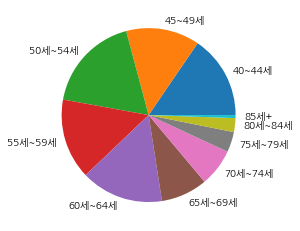

In [66]:
a = [1547, 1369, 1798, 1498, 1534, 865, 698, 377, 259, 55]
b = ['40~44세', '45~49세', '50세~54세', '55세~59세', '60세~64세', '65세~69세', '70세~74세', '75세~79세', '80세~84세', '85세+']

plt.pie(a, labels =b)
plt.show()

**연령대 별 시력 분포도 알아보기**

[(8.0, 19.0), (0.0, 2.5)]

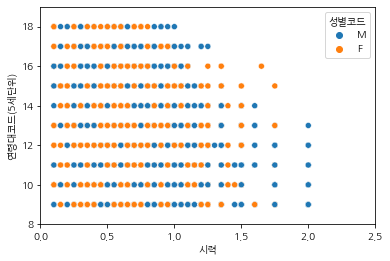

In [10]:
fm._rebuild()

sns.scatterplot(data= health, x = '시력', y = '연령대코드(5세단위)', hue = '성별코드').set(xlim = (0,2.5), ylim = (8,19))

*   코드9 = 40~44세
*   연속적으로 밀도있는 부분을 위주로 판단했을 때, 55세(코드12)부터 시력이 점차 감소하는 추세로 접어든다.

**연령대 별 청력 분포도 알아보기**

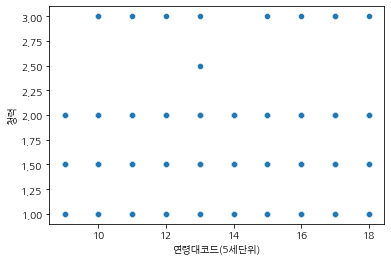

In [90]:
sns.scatterplot(data= health, x = '연령대코드(5세단위)', y = '청력')

 *   좌우의 평균 청력값을 입력한 것으로 1.00은 양쪽 귀 정상, 1.50은 한쪽 귀 질환 의심, 2.00은 양쪽 귀 질환 의심 혹은 한쪽 귀 정상 한쪽 귀 측정 불가, 2.50은 한쪽 귀 질환, 한쪽 귀 측정 불가, 3.00은 양쪽 귀 측정 불가를 뜻한다.

*   청력은 40세 이상 집단에서 연령에 따른 뚜렷한 변화가 보이지 않았다. 



In [104]:
health_smk = health[health['흡연상태'] == 'Yes']
display(health_smk.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,26.0,Yes,Yes,0,NaN,NaN,12/29/2021,1.20,1.0,24.8
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,0.75,1.5,29.4
7,2020,8,41,M,13,160,65,92.0,0.5,0.5,...,19.0,Yes,No,1,0.0,2.0,12/29/2021,0.50,1.0,25.4
11,2020,12,41,F,11,150,45,63.0,0.6,0.5,...,24.0,Yes,Yes,0,NaN,NaN,12/29/2021,0.55,1.0,20.0
12,2020,13,41,M,14,175,80,90.0,0.8,0.7,...,41.0,Yes,Yes,1,0.0,0.0,12/29/2021,0.75,1.0,26.1


In [106]:
health_nnsm = health[health['흡연상태'] == 'NotNow']
display(health_nnsm.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
26,2020,27,42,M,11,170,75,87.0,1.5,1.0,...,20.0,NotNow,Yes,0,NaN,NaN,12/29/2021,1.25,1.0,26.0
28,2020,29,41,M,11,165,55,82.0,1.0,1.0,...,29.0,NotNow,Yes,1,1.0,0.0,12/29/2021,1.00,1.0,20.2
37,2020,38,44,M,9,165,75,84.0,1.0,1.0,...,25.0,NotNow,Yes,1,0.0,1.0,12/29/2021,1.00,1.0,27.5
40,2020,41,31,M,12,165,60,76.2,1.2,0.8,...,14.0,NotNow,Yes,1,0.0,0.0,12/29/2021,1.00,1.0,22.0
44,2020,45,48,M,12,170,75,85.0,0.7,0.8,...,18.0,NotNow,Yes,1,0.0,1.0,12/29/2021,0.75,1.0,26.0


In [107]:
health_nsm = health[health['흡연상태'] == 'No']
display(health_nsm.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,22.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,No,No,0,NaN,NaN,12/29/2021,0.80,1.0,28.9
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,7.0,No,No,0,NaN,NaN,12/29/2021,0.65,1.0,22.9
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,72.0,No,No,1,0.0,0.0,12/29/2021,1.00,1.5,27.3
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,14.0,No,No,0,NaN,NaN,12/29/2021,1.35,1.0,20.8


**흡연자의 연령대 별 빈도수**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


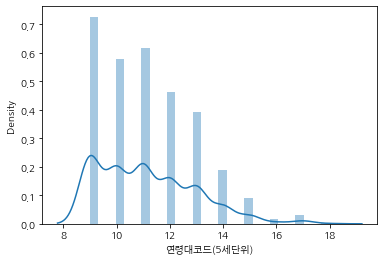

In [105]:
sns.distplot(health_smk['연령대코드(5세단위)'])
plt.show()

**NotNow 금연자의 연령대 별 빈도수**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


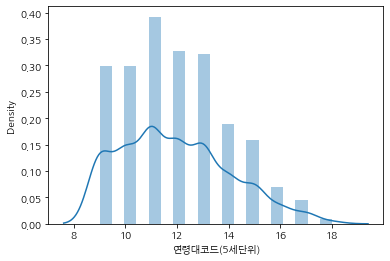

In [108]:
sns.distplot(health_nnsm['연령대코드(5세단위)'])
plt.show()

**금연자의 연령대 별 빈도수**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


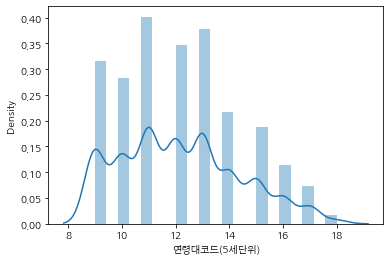

In [109]:
sns.distplot(health_nsm['연령대코드(5세단위)'])
plt.show()

* 연령대 별 흡연자의 분포를 살펴보았으나, 연령대의 균형이 고르지 않으므로 판단하기 어렵다.

**연령대 별 대푯값을 평균으로 산정하기**

In [77]:
means = round(health.groupby('연령대코드(5세단위)').mean(),2)   # 연령대 별로 모든 수치 변수의 평균값을 구함 
display(means)
print(means.isnull().sum())

,기준년도,가입자일련번호,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석,시력,청력,BMI
연령대코드(5세단위),,,,,,,,,,,,,,,,,,,,,
9,2020.0,5112.39,34.00,165.80,67.08,81.56,1.07,1.08,1.01,1.01,...,0.84,25.56,28.46,39.66,0.40,0.23,0.63,1.08,1.01,24.25
10,2020.0,4929.59,33.93,164.34,66.22,81.61,1.00,1.01,1.02,1.01,...,0.85,26.31,28.14,42.07,0.35,0.20,0.59,1.01,1.01,24.36
11,2020.0,4989.80,34.24,161.90,63.73,81.58,0.99,0.99,1.02,1.02,...,0.83,27.91,27.55,39.55,0.37,0.16,0.62,0.99,1.02,24.19
12,2020.0,4910.77,34.41,160.88,62.87,82.12,0.96,0.95,1.04,1.03,...,0.84,28.04,26.69,40.09,0.34,0.17,0.61,0.95,1.04,24.20
13,2020.0,4956.78,33.98,159.16,61.54,82.82,0.89,0.86,1.05,1.05,...,0.84,28.33,26.50,37.84,0.30,0.16,0.56,0.87,1.05,24.22
14,2020.0,5110.01,33.85,158.09,60.51,83.48,0.83,0.85,1.07,1.06,...,0.88,29.52,26.95,34.51,0.26,0.12,0.48,0.84,1.06,24.16
15,2020.0,5031.51,33.38,156.47,59.32,83.61,0.76,0.77,1.12,1.13,...,0.87,28.69,23.55,29.99,0.25,0.12,0.43,0.76,1.13,24.19
16,2020.0,5111.05,34.62,153.83,57.57,84.55,0.71,0.75,1.16,1.16,...,0.87,27.99,22.08,28.41,0.22,0.14,0.46,0.73,1.16,24.28
17,2020.0,4986.05,34.92,153.55,55.85,85.01,0.74,0.78,1.25,1.22,...,0.94,28.18,22.82,36.83,0.15,0.18,0.41,0.76,1.24,23.65


기준년도          0
가입자일련번호       0
시도코드          0
신장(5Cm단위)     0
체중(5Kg 단위)    0
허리둘레          0
시력(좌)         0
시력(우)         0
청력(좌)         0
청력(우)         0
수축기혈압         0
이완기혈압         0
식전혈당(공복혈당)    0
총콜레스테롤        0
트리글리세라이드      0
HDL콜레스테롤      0
LDL콜레스테롤      0
혈색소           0
요단백           0
혈청크레아티닌       0
(혈청지오티)AST    0
(혈청지오티)ALT    0
감마지티피         0
구강검진수검여부      0
치아우식증유무       0
치석            0
시력            0
청력            0
BMI           0
dtype: int64


**연령대와 시력의 연관성 알아보기**

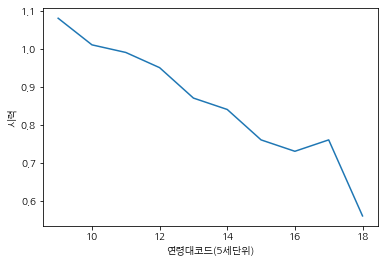

In [60]:
sns.lineplot(data = means, x = '연령대코드(5세단위)', y = '시력')

*   연령대가 높아질수록 시력이 감소하는 음적 상관관계를 볼 수 있다. 40대의 평균 1.1의 시력이 80대까지 0.5정도 떨어지는 것을 나타내는 결과는 노화가 진행되는 속도의 정도를 짐작케 한다. 어림잡아 10년에 0.1씩 시력이 안 좋아질 수 있다.

**연령대와 청력의 연관성 알아보기**

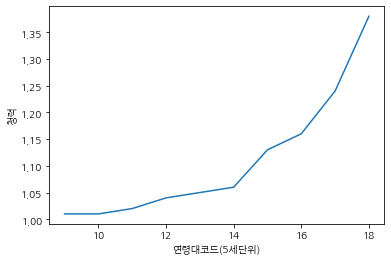

In [61]:
sns.lineplot(data = means, x = '연령대코드(5세단위)', y = '청력')

*   연령대가 높아질수록 청력이 질환의심 수치에 가까워지는 것을 알 수 있다. 양적 상관관계이며 노화로 인해 청력이 손상되는 것을 시각화한다.

**연령대와 비만도의 연관성 알아보기**

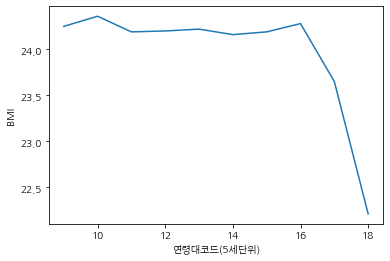

In [62]:
sns.lineplot(data = means, x = '연령대코드(5세단위)', y = 'BMI')



*   연령대 별로 평이한 비만도를 나타내는 그래프는 연령대와 비만도가 큰 관계 없음을 보여준다.



**연령대와 콜레스테롤 수치의 연관성 알아보기**

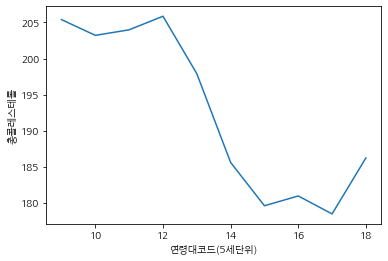

In [79]:
sns.lineplot(data = means, x = '연령대코드(5세단위)', y = '총콜레스테롤')

*   40대에서 60대 사이 총콜레스테롤 수치가 매우 높다.
*   60대와 70대 사이 총콜레스테롤 수치가 큰 폭으로 감소하는 것을 알 수 있다.

실제로 40대부터 60대까지 콜레스테롤 수치가 가장 높은 시기이며, 나이가 들며 혈관벽이 두꺼워지면서 혈관 내벽에 콜레스테롤이 쌓이는 것이 원인이며, 70대부터는 혈액구성에 치명적인 변화가 있다는 연구결과가 있다. 

**연령대와 식전혈당의 연관성 알아보기**

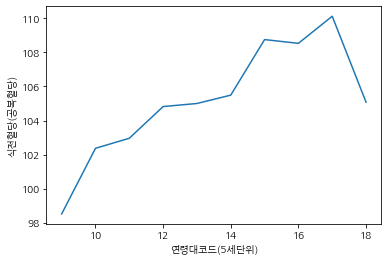

In [78]:
sns.lineplot(data = means, x = '연령대코드(5세단위)', y = '식전혈당(공복혈당)')

* 전반적으로 연령대가 높아질수록 식전혈당 수치도 높아지지만, 80대부터 그 수치가 꺾이는 것을 알 수 있다. 60세부터 70세까지 큰 폭으로 감소한 콜레스테롤과 달리 식전혈당은 60대에도 상승세를 유지하고 있다. 정상치는 70~100mg 가량이며, 126mg이상의 경우 당뇨병 위험이 있다. 따라서 나이가 들며 혈당수치를 관리할 필요가 있다.

당뇨의 원인으로는 비만, 노화, 식생활, 유전적 요인 등이 있다. 밑에서 비만과 식전혈당수치의 관계성을 살펴보도록 한다.

###3-2. 성별 별로 알아보기

  성별코드     n
0    F  4862
1    M  5138


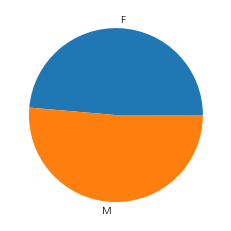

In [76]:
df_sex = health.groupby('성별코드', as_index = False).agg(n = ('성별코드', 'count'))

print(df_sex)

c = [4862/10000 * 100, 5138/10000 * 100]
d = ['F', 'M']

plt.pie(c, labels =d)
plt.show()



*   성별의 비율은 48.62 : 51.38 로 대등하다.



**남녀 전체의 흡연상태**

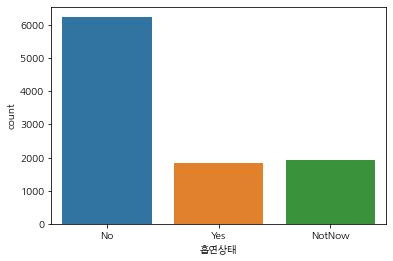

In [15]:
sns.countplot(data = health, x = '흡연상태')

**여성의 흡연상태**

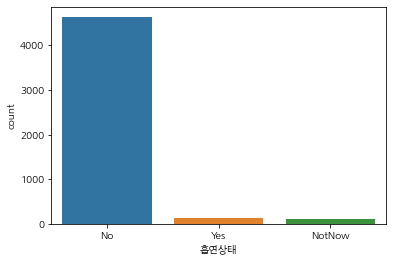

In [17]:
sns.countplot(data = health_wom, x = '흡연상태')

**남성의 흡연상태**

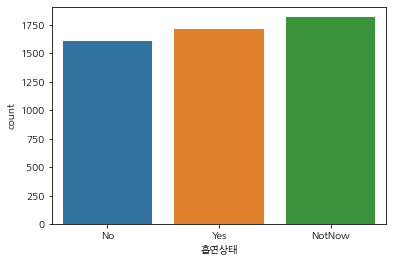

In [16]:
sns.countplot(data = health_man, x = '흡연상태')

In [18]:
df_sm_m = health_man.groupby('흡연상태', as_index = False).agg(n = ('흡연상태', 'count'))
df_sm_w = health_wom.groupby('흡연상태', as_index = False).agg(n = ('흡연상태', 'count'))
print("smoking man : ", df_sm_m)
print("smoking woman : ", df_sm_w)

smoking man :       흡연상태     n
0      No  1605
1  NotNow  1819
2     Yes  1713
smoking woman :       흡연상태     n
0      No  4626
1  NotNow   107
2     Yes   128


**남성과 여성의 흡연 상태 비교**

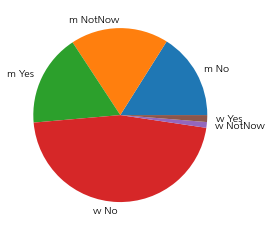

In [19]:
x = [1605, 1819, 1713, 4626, 107, 128]
y = ['m No', 'm NotNow', 'm Yes', 'w No', 'w NotNow', 'w Yes']

plt.pie(x, labels =y)
plt.show()

In [92]:
sum = 1605+1819+1713+4626+107+128
mNo = round(1605/sum*100,2)
mNNow = round(1819/sum*100,2)
mYes = round(1713/sum*100,2)
wNo = round(4626/sum*100,2)
wNNow = round(107/sum*100,2)
wYes = round(128/sum*100,2)
print(mNo, mNNow, mYes, wNo, wNNow, wYes)

16.05 18.19 17.13 46.27 1.07 1.28


*   흡연 경험이 있는 남성은 35.32%P, 흡연 경험이 있는 여성은 2.35%p로 압도적으로 남성의 흡연률이 여성의 흡연률 보다 높은 것을 알 수 있다.

**남녀 전체의 음주여부**

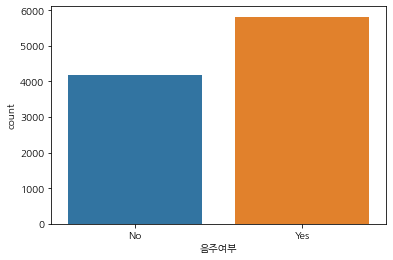

In [20]:
sns.countplot(data = health, x = '음주여부')

* 음주를 하는 사람이 금주를 하는 사람보다 많다.

**여성의 음주여부**

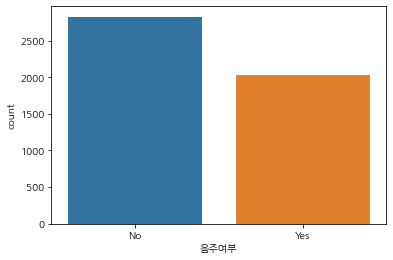

In [22]:
sns.countplot(data = health_wom, x = '음주여부')

* 40대 이상 여성 중에는 금주를 하는 여성이 더 많다. 

In [112]:
health_drkw = health_wom[health_wom['음주여부'] == 'Yes']
display(health_drkw.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
11,2020,12,41,F,11,150,45,63.0,0.6,0.5,...,24.0,Yes,Yes,0,NaN,NaN,12/29/2021,0.55,1.0,20.0
13,2020,14,44,F,10,160,75,89.0,0.5,0.9,...,15.0,No,Yes,0,NaN,NaN,12/29/2021,0.70,1.0,29.3
14,2020,15,11,F,11,145,50,75.4,0.9,1.0,...,18.0,No,Yes,0,NaN,NaN,12/29/2021,0.95,1.0,23.8
22,2020,23,43,F,11,155,55,79.0,1.0,0.8,...,13.0,No,Yes,0,NaN,NaN,12/29/2021,0.90,1.0,22.9
31,2020,32,27,F,9,155,60,67.0,1.2,1.0,...,30.0,No,Yes,0,NaN,NaN,12/29/2021,1.10,1.0,25.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


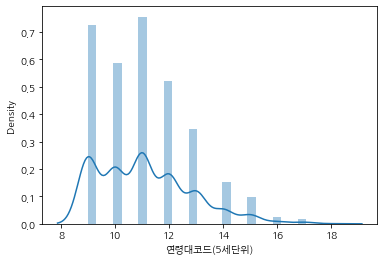

In [113]:
sns.distplot(health_drkw['연령대코드(5세단위)'])
plt.show()

여성의 연령대 별 흡연자의 분포를 살펴보았으나, 연령대의 균형이 고르지 않으므로 판단하기 어렵다.

**남성의 음주여부**

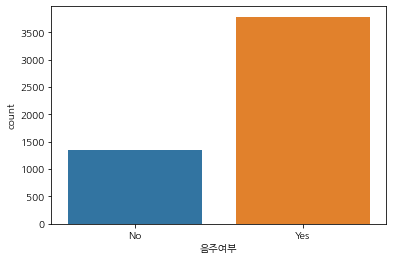

In [21]:
sns.countplot(data = health_man, x = '음주여부')

* 40대 이상 남성 중에는 음주를 하는 남성이 더 많다.

In [114]:
health_drkm = health_man[health_man['음주여부'] == 'Yes']
display(health_drkm.head())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,시력,청력,BMI
5,2020,6,27,M,9,185,85,94.0,1.2,1.2,...,26.0,Yes,Yes,0,NaN,NaN,12/29/2021,1.20,1.0,24.8
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,0.75,1.5,29.4
12,2020,13,41,M,14,175,80,90.0,0.8,0.7,...,41.0,Yes,Yes,1,0.0,0.0,12/29/2021,0.75,1.0,26.1
15,2020,16,41,M,10,165,75,96.0,0.6,0.3,...,48.0,Yes,Yes,0,NaN,NaN,12/29/2021,0.45,1.0,27.5
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,24.0,No,Yes,1,0.0,1.0,12/29/2021,0.60,1.0,25.4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


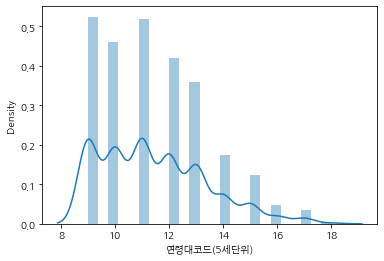

In [115]:
sns.distplot(health_drkm['연령대코드(5세단위)'])
plt.show()

남성의 연령대 별 흡연자의 분포를 살펴보았으나, 연령대의 균형이 고르지 않으므로 판단하기 어렵다.

**여성의 비만도**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


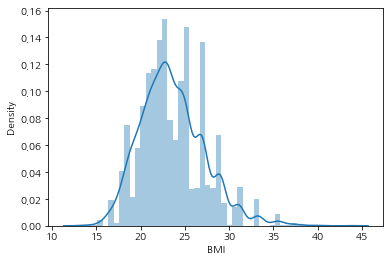

In [88]:
sns.distplot(health_wom['BMI'])
plt.show()

**남성의 비만도**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


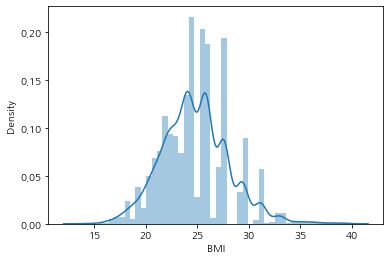

In [89]:
sns.distplot(health_man['BMI'])
plt.show()

* 성별 별 비만도를 비교해 봤을 때 BMI를 기준으로 그래프가 오른쪽으로 치우쳐 있는 남성의 비만도가 더 높은 것을 알 수 있다.

**여성의 식전혈당 수치**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


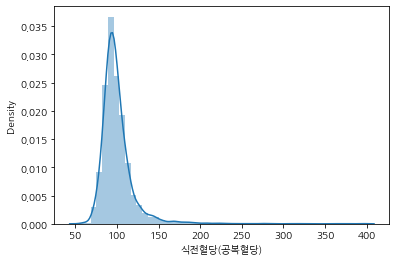

In [93]:
sns.distplot(health_wom['식전혈당(공복혈당)'])
plt.show()

**남성의 식전혈당 수치**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


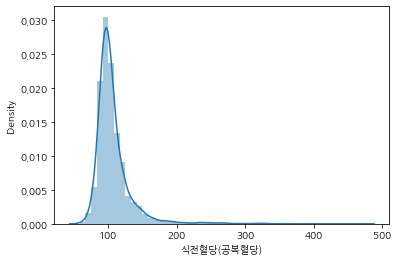

In [94]:
sns.distplot(health_man['식전혈당(공복혈당)'])
plt.show()

In [100]:
health_wom['식전혈당(공복혈당)'].max()
sugarwom = health_wom.groupby('식전혈당(공복혈당)', as_index = False).agg(n = ('식전혈당(공복혈당)', 'count'))
print(sugarwom.max())

식전혈당(공복혈당)    397.0
n             206.0
dtype: float64


In [98]:
health_man['식전혈당(공복혈당)'].max()
sugarman = health_man.groupby('식전혈당(공복혈당)', as_index = False).agg(n = ('식전혈당(공복혈당)', 'count'))
print(sugarman.max())

식전혈당(공복혈당)    473.0
n             184.0
dtype: float64


* 남성의 최고 혈당 수치가 여성의 혈당 수치보다 높고, 분포도를 봤을 때 200에 가까운 수치를 기준으로 그래프를 비교하면 남성의 빈도수가 더 크기 때문에 남성의 식전혈당수치가 더 높다고 볼 수 있다.

### 3-3. 총콜레스테롤의 원인

데이터 분석을 통해 연령대 별 및 성별 별 시력, 청력, 비만도, 흡연상태, 음주여부, 총콜레스테롤, 식전혈당과의 연관성을 살펴보았다. 그러나 흡연률, 음주율, 비만도, 식전혈당 전부 더 높은 남성보다, 여성이 높은 총콜레스테롤 수치를 갖는다는 것은 의아한 결과이다. 따라서 총콜레스테롤의 원인을 찾아보고자 한다. 

[(250.0, 400.0)]

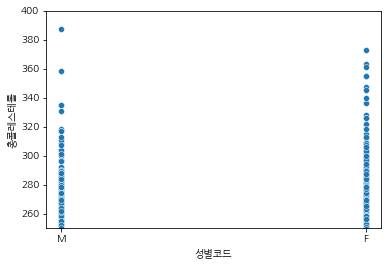

In [86]:
sns.scatterplot(data = health, x = '성별코드', y='총콜레스테롤').set(ylim = (250, 400))

* 정상치를 넘어선(250mg/dL 이상) 데이터들 중 높은 총콜레스테롤 수치를 가진 여성의 빈도수가 더 많다. 

[(170.0, 300.0)]

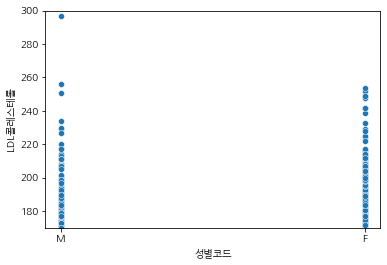

In [122]:
sns.scatterplot(data = health, x = '성별코드', y='LDL콜레스테롤').set(ylim = (170, 300))

* 고LDL혈증인 (170mg/dL 이상) 데이터들 중에도 높은 LDL콜레스테롤 수치를 가진 여성의 빈도수가 더 많다. 

[(250.0, 400.0)]

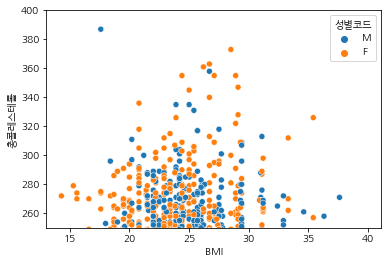

In [50]:
sns.scatterplot(data = col, x = 'BMI', y= '총콜레스테롤', hue = '성별코드').set(ylim = (250,400))

* BMI가 20 후반을 넘어갈 때, 남성의 총콜레스테롤 수치는 아래쪽에만 머물고 있는 것을 알 수 있다. 같은 비만도를 가진 사람이라도 여성은 콜레스테롤에 취약하다. 

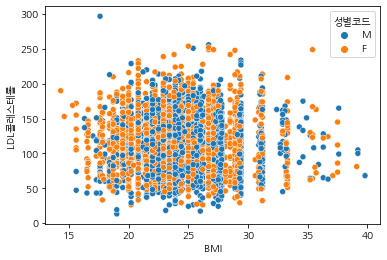

In [119]:
sns.scatterplot(data = col, x = 'BMI', y= 'LDL콜레스테롤', hue = '성별코드')

* LDL콜레스테롤을 살펴봐도 여성의 데이터가 위쪽에 더 많이 분포되어 있는 것을 볼 수 있다.
* 여성에게서 콜레스테롤이 높아지는 원인으로 갱년기를 꼽는 전문가들이 있다. 40대 이후 폐경기 전후로 여성호르몬 에스트로겐이 감소하고 LDL콜레스테롤이 오르게 된다는 것이 근거이다.
* 따라서 콜레스테롤의 원인은 복합적이며, 비만도와 식전혈당이 콜레스테롤 수치와 상관관계를 보일 수는 있으나 인과관계를 증명하긴 어려울 것이다.
* 또한 총콜레스테롤의 상승이 사망률의 증가와 관계한다는 연구결과가 있으나, 콜레스테롤의 기준치가 남성과 여성에게 다르게 적용되어야 한다는 전문가의 의견이 있었다. 

[(126.0, 300.0)]

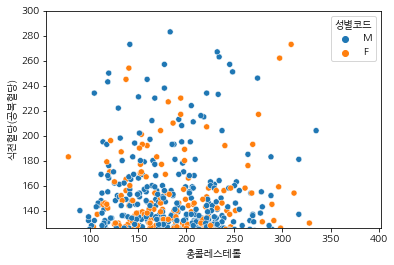

In [117]:
sns.scatterplot(data = col, x = '총콜레스테롤', y= '식전혈당(공복혈당)', hue = '성별코드').set(ylim = (126,300))

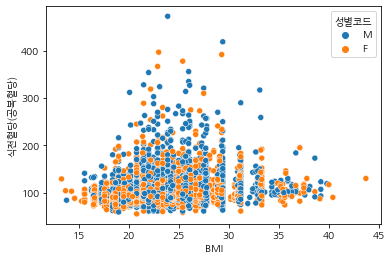

In [52]:
sns.scatterplot(data = blsu, x = 'BMI', y= '식전혈당(공복혈당)', hue = '성별코드')